# 📷 Flickr

## Projet

Dans une optique d'amélioration d'une prise en charge des lieux touristiques à Lyon notamment via les transports en commun, une étude sur les données des photos prises a été commanditée. Pour ce faire, vous devrez travailler sur une extraction d'une base de données Flickr.

Exploitez pleinement l'ensemble de données (textuelles, numériques et de localisation of course) et soyez force de proposition. 

# 📜 Sommaire

* [Exploratory Data Analysis (EDA)](#EDA)
* [Cleaning](#Cleaning)
* [Geocoder](#Geocoder)
* [Kmeans](#Kmeans)
* [Text mining](#Text-mining)
* [Date / Mine](#Date-/-Time)
* [Select 50 places](#Select-50-places)
* [Visu top 50](#Visu-top-50)

## Import

In [15]:
# basics
import numpy as np
import pandas as pd
import csv

# warning
import warnings
warnings.filterwarnings("ignore")

# geocoder
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# time is life
from tqdm import tqdm, tqdm_notebook
from datetime import datetime

# kmeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# text mining
import spacy

# visu
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("data/flickr_data.csv", error_bad_lines=False)

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


# EDA

In [48]:
df

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,22653655033,77161041@N00,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,46,18,24,11,2015,46,18,24,11,2015
1,22884818287,113280318@N03,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,3,17,24,11,2015,3,17,24,11,2015
2,23277598065,132999708@N08,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),0,15,7,11,2015,50,15,24,11,2015
3,22883485267,132999708@N08,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),1,15,7,11,2015,50,15,24,11,2015
4,23249102166,133835212@N03,45.699105,4.474932,"sunset,sky,cloud,sun,soleil,coucherdesoleil",Un soir dans les Monts du Lyonnais,20,20,31,8,2015,50,13,24,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83832,23209737151,124810342@N04,45.586836,4.774372,"france,animal,animaux,fr,extérieur,oiseau,héro...",Canard colvert (Anas Platyrhynchos),5,13,4,10,2015,50,5,25,11,2015
83833,22924430539,124810342@N04,45.586836,4.774372,"france,animal,animaux,fr,extérieur,oiseau,héro...",Canard colvert (Anas Platyrhynchos),5,13,4,10,2015,50,5,25,11,2015
83834,22924413449,124810342@N04,45.586836,4.774372,"france,animal,animaux,fr,extérieur,oiseau,héro...",Canard colvert (Anas Platyrhynchos),5,13,4,10,2015,49,5,25,11,2015
83835,23292336555,124810342@N04,45.586836,4.774372,"france,animal,animaux,fr,extérieur,oiseau,héro...",Canard colvert (Anas Platyrhynchos),5,13,4,10,2015,49,5,25,11,2015


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83837 entries, 0 to 83836
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   83837 non-null  int64  
 1    user                83837 non-null  object 
 2    lat                 83837 non-null  float64
 3    long                83837 non-null  float64
 4    tags                72076 non-null  object 
 5    title               79009 non-null  object 
 6    date_taken_minute   83837 non-null  int64  
 7    date_taken_hour     83837 non-null  int64  
 8    date_taken_day      83837 non-null  int64  
 9    date_taken_month    83837 non-null  int64  
 10   date_taken_year     83837 non-null  int64  
 11   date_upload_minute  83837 non-null  int64  
 12   date_upload_hour    83837 non-null  int64  
 13   date_upload_day     83837 non-null  int64  
 14   date_upload_month   83837 non-null  int64  
 15   date_upload_year    83837 non-null 

In [23]:
# count of missing values in dataset and where are they
df.isnull().sum()

id                         0
 user                      0
 lat                       0
 long                      0
 tags                  11761
 title                  4828
 date_taken_minute         0
 date_taken_hour           0
 date_taken_day            0
 date_taken_month          0
 date_taken_year           0
 date_upload_minute        0
 date_upload_hour          0
 date_upload_day           0
 date_upload_month         0
 date_upload_year          0
dtype: int64

In [24]:
#get numerical and categorical col
numeric_col=[col for col in df if df[col].dtype !="object" ]
categorical_col=[col for col in df if df[col].dtype=="object" ]
print("Numerical col:",numeric_col)
print("Categorical col:",categorical_col)

Numerical col: ['id', ' lat', ' long', ' date_taken_minute', ' date_taken_hour', ' date_taken_day', ' date_taken_month', ' date_taken_year', ' date_upload_minute', ' date_upload_hour', ' date_upload_day', ' date_upload_month', ' date_upload_year']
Categorical col: [' user', ' tags', ' title']


In [49]:
# sum of duplicates
df.duplicated().sum()

68635

In [50]:
# 88% duplicates in dataset
df.duplicated(keep=False).mean()

0.8796354831399025

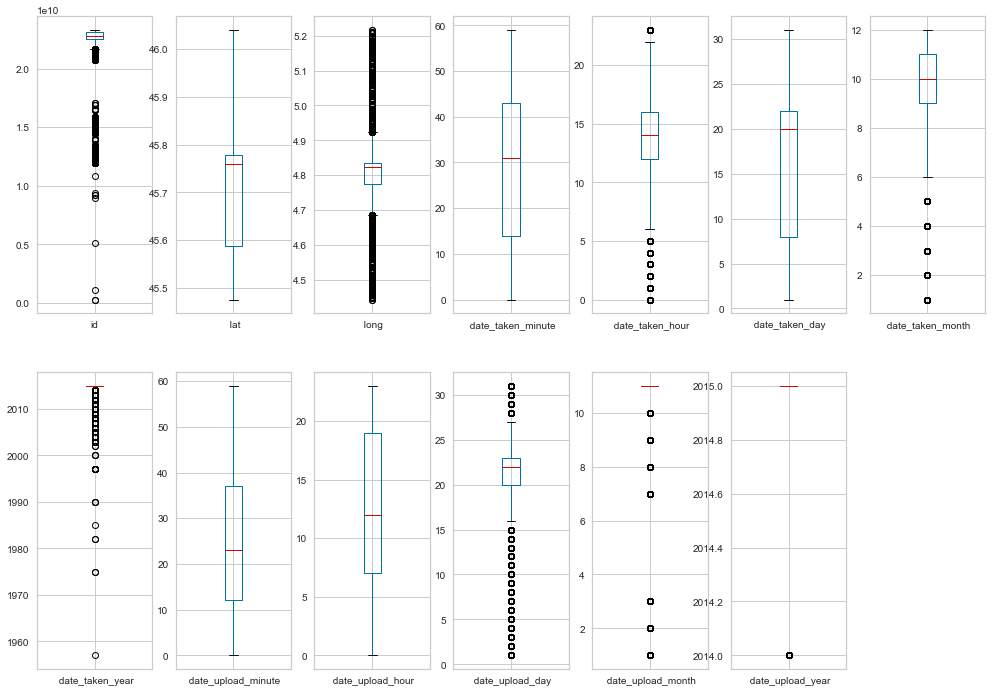

In [51]:
#individual boxplot
df.plot(kind='box', subplots=True, layout=(2, 7), figsize=(17, 12));

# Cleaning

In [3]:
# drop duplicates
df = df.drop_duplicates()

In [4]:
# drop the space before title of columns
df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]

In [5]:
# transform date_taken, date_upload and hours
df['date_taken'] = df['date_taken_day'].map(str) + '/' + df['date_taken_month'].map(str) + '/' + df['date_taken_year'].map(str)
df['time_taken'] = df['date_taken_hour'].map(str) + ':' + df['date_taken_minute'].map(str)
df['date_upload'] = df['date_upload_day'].map(str) + '/' + df['date_upload_month'].map(str) + '/' + df['date_upload_year'].map(str)
df['time_upload'] = df['date_upload_hour'].map(str) + ':' + df['date_upload_minute'].map(str)

df.drop(['date_taken_minute','date_taken_hour','date_taken_day','date_taken_month','date_taken_year', 'date_upload_minute','date_upload_hour','date_upload_day','date_upload_month','date_upload_year', 'id', 'user'], axis=1, inplace=True)

# Geocoder

In [26]:
# create column geo with latitude & longitude
df['geo'] = df['lat'].map(str) + ',' + df['long'].map(str)
df['geo'][0]

'45.768121,4.801776'

In [29]:
# geopy geocoder & time limit
locator = Nominatim(user_agent='myGeocoder', timeout=10)
tqdm_notebook().pandas()
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [32]:
# sample for testing geocoder
df_test = df.sample(n=100)

# geocoder sample (100 rows)
df_test['adresse'] = df_test['geo'].progress_apply(rgeocode)
df_test.head()

  0%|          | 0/100 [00:00<?, ?it/s]

,lat,long,tags,title,date_taken,time_taken,date_upload,time_upload,geo,adresse
79710,45.718155,4.893694,NaN,DSC03439,24/7/2013,18:32,19/1/2014,21:28,"45.718154999999996,4.893694","(Plaine des Sports du Parc de Parilly, Allée d..."
2331,45.757666,4.832375,"france,lyon,bellecour,rhônealpes",Lyon : place Bellecour,19/8/2015,16:3,16/10/2015,6:57,"45.757666,4.832375","(Statue équestre de Louis XIV, Place Bellecour..."
4213,45.584872,4.772863,"france,lyon,fr,oiseau,rhone,rhônealpes,givors,...",Étourneau sansonnet (Sturnus vulgaris),1/8/2015,12:51,13/9/2015,17:41,"45.584872,4.772863","(19, Rue Joseph Longarini, Givors, Lyon, Métro..."
1743,45.761817,4.828929,"france,lyon,file:md5sum=38dde98739fb0507166e23...","Passerelle du Palais de Justice, Lyon",24/10/2015,19:36,24/10/2015,19:36,"45.761817,4.8289290000000005","(Parc Saint-Jean - LPA, Quai Romain Rolland, S..."
4287,45.735152,4.818291,NaN,Scooter business Lyon france,7/11/2015,14:58,23/11/2015,19:1,"45.735152,4.818291","(Rue Eynard, Confluence, Lyon 2e Arrondissemen..."


In [34]:
# geocoder on all dataset
df['adresse'] = df['geo'].progress_apply(rgeocode)
df.head()

  0%|          | 0/15202 [00:00<?, ?it/s]

,lat,long,tags,title,date_taken,time_taken,date_upload,time_upload,geo,adresse
0,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,24/11/2015,18:46,24/11/2015,18:46,"45.768121,4.801776","(9057, Rue Louis Loucheur, Gorge de Loup, Lyon..."
1,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,24/11/2015,17:3,24/11/2015,17:3,"45.7597,4.8422","(Vanetta Cuisine, Rue Servient, Préfecture, Ly..."
2,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),7/11/2015,15:0,24/11/2015,15:50,"46.027633,4.699855","(Salle Gauguin, Route de Longsard, Le Pré du M..."
3,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),7/11/2015,15:1,24/11/2015,15:50,"46.027572,4.699966000000001","(Salle Gauguin, Route de Longsard, Le Pré du M..."
4,45.699105,4.474932,"sunset,sky,cloud,sun,soleil,coucherdesoleil",Un soir dans les Monts du Lyonnais,31/8/2015,20:20,24/11/2015,13:50,"45.699104999999996,4.474932","(Route de Sainte-Foy-l'Argentière, Le Bourg, A..."


In [36]:
# export dataframe to CSV
df.to_csv(r'df_geo.csv', index = False)

# Kmeans

In [9]:
# kmeans on latitude & longitude
df_k = df[["lat", "long"]]

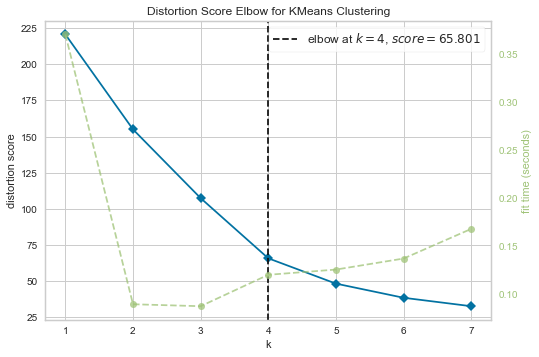

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# plot elbow for choose number of clusters
model_km = KMeans()
visualizer = KElbowVisualizer(model_km, k =(1,8))
visualizer.fit(df_k)
visualizer.show()

In [11]:
# define cluster
model = KMeans(n_clusters=4)

# fit
pred = model.fit_predict(df_k)

# silhouette score
silhouette_score(df_k, pred)

0.7080175576352171

In [12]:
# new column "cluster" in dataset df_k1
df_k['cluster']= pred

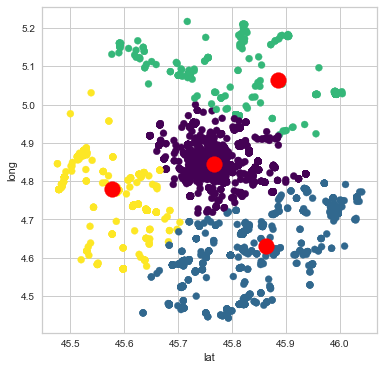

In [13]:
# visualisation K-Means with centroid
plt.figure(figsize=(6,6))
plt.scatter(df_k['lat'],df_k['long'],c=pred, cmap="viridis")
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'red', s = 250)
plt.xlabel('lat')
plt.ylabel('long')
plt.show()

# Text mining

In [8]:
# load text
text_title = df['title']

In [9]:
# transform text into list
text_title.tolist()

['Enfin. #instabeer #beer #chimay #apero',
 'https://www.facebook.com/PascalFrontiPhotographie/photos/a.400754443288716.92556.400751579955669/1039351156095705/?type=3&theater #hommage #solidarité #solidarité #fetedeslumieres #follow #followme #follow4follow #followforfollow #instagrammers #instalyon',
 'compagnons_dev_arnas20 (1)',
 'compagnons_dev_arnas20 (3)',
 'Un soir dans les Monts du Lyonnais',
 'InCity, Lyon, France, 2015',
 nan,
 "@Bidule_officiel C'est à la Renaissance que l'on a inventé métro londonien. It is in the Renaissance that we invented the londonian underground. www.monsieurbidule.net  #igers #igersart #igersparis #igersstreet #igersstreetart #paris #streetart #spaceinva",
 'Grand Cormoran (Phalacrocorax carbo)',
 'Grand Cormoran (Phalacrocorax carbo)',
 "Martin-pêcheur d'Europe (Alcedo atthis)",
 "Martin-pêcheur d'Europe (Alcedo atthis)",
 "Martin-pêcheur d'Europe (Alcedo atthis)",
 'Grand Cormoran (Phalacrocorax carbo)',
 'Grand Cormoran (Phalacrocorax carbo)',
 'G

In [10]:
# join texte
text_title = ",".join(map(str, text_title))

In [19]:
# load spacy
nlp = spacy.load("fr_core_news_sm")
#nlp.max_length = 2084327

In [20]:
# define nlp text
doc = nlp(text_title)

In [21]:
# spacy stop words fr
fr_stop = nlp.Defaults.stop_words

In [22]:
# function wordcloud
def make_word_cloud(doc, stopwords = None) -> None:
    wordcloud = WordCloud(background_color = 'white', max_words = None, stopwords=fr_stop, width=1000, height=600).generate(doc.text)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

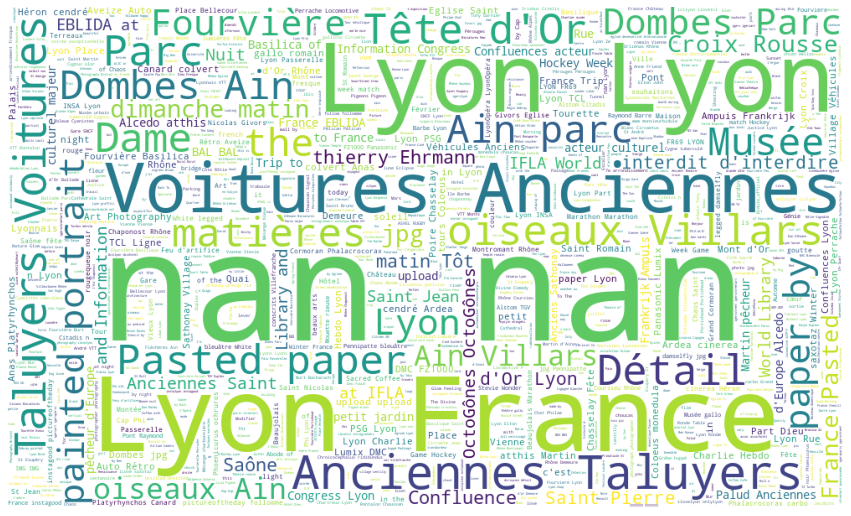

In [23]:
# view wordcloud
make_word_cloud(doc)

# Date / Time

In [15]:
# load dataset with address
df_time = pd.read_csv("data/df_geo.csv", error_bad_lines=False)

In [4]:
df_time['date_taken'].value_counts()

3/4/2013      536
18/10/2015    257
24/7/2013     247
27/9/2015     207
6/10/2014     183
             ... 
23/10/2015      1
22/9/2013       1
15/7/2013       1
24/8/2011       1
20/5/2011       1
Name: date_taken, Length: 797, dtype: int64

<img src='img/heures.JPG' width='800'>

<img src='img/mois.JPG' width='800'>

# Select 50 places

In [143]:
# load dataset with address
df = pd.read_csv("data/df_geo.csv", error_bad_lines=False)

In [144]:
# display all rows
pd.set_option("display.max_rows", None)

In [157]:
# view top 50
for lieu in enumerate(df['adresse'].value_counts().index.tolist()[0:60]):
    print(lieu)

(0, 'Institut National des Sciences Appliquées de Lyon, 20, Avenue Albert Einstein, Croix-Luizet, Villeurbanne, Lyon, Métropole de Lyon, Circonscription départementale du Rhône, Auvergne-Rhône-Alpes, France métropolitaine, 69100, France')
(1, 'Plaine des Sports du Parc de Parilly, Allée des Douglas, Vénissieux, Lyon, Métropole de Lyon, Circonscription départementale du Rhône, Auvergne-Rhône-Alpes, France métropolitaine, 69200, France')
(2, "La Demeure du Chaos, Chemin de la Cressonnière, Saint-Romain-au-Mont-d'Or, Lyon, Métropole de Lyon, Circonscription départementale du Rhône, Auvergne-Rhône-Alpes, France métropolitaine, 69270, France")
(3, 'Parc des Oiseaux, Route de Birieux, Montrottier, Terment, Villars-les-Dombes, Bourg-en-Bresse, Ain, Auvergne-Rhône-Alpes, France métropolitaine, 01330, France')
(4, "Passerelle de l'Amitié, Givors, Lyon, Métropole de Lyon, Circonscription départementale du Rhône, Auvergne-Rhône-Alpes, France métropolitaine, 69700, France")
(5, "137, Rue d'Alger, 

# Visu top 50


In [24]:
# load dataset with adress
top50 = pd.read_csv("data/df_top_50.csv", error_bad_lines=False)

In [25]:
map = folium.Map(location=[top50.lat.mean(), top50.long.mean()], zoom_start=14, control_scale=True)
#map

for index, loc in top50.iterrows(): 
    folium.Marker([loc["lat"], loc["long"]], popup=loc["adresse"]).add_to(map)

In [26]:
map

In [ ]:
# Lyon 1 : Opéra de Lyon, Palais St Pierre, Fontaine Bartholdi, Quai de la Pêcherie
# Lyon 2 : Fontaine des Jacobins, Bellecour, Patinoire Charlemagne, La Sucrière, Confluence, Musée des Confluences
# Lyon 3 : La Part Dieu
# Lyon 5 : Traboules de Lyon, Basilique de Fourvière, Esplanade de Fourvière, Théâtre Gallo-Romain de Fourvière
# Lyon 6 : Parc de la Tête d'or, Cité Internationale, Centre des Congrès
# Lyon 7 : Halle Tony Garnier, Matmut Stadium

# Nord 
# St Romain au Mont d'Or : La Demeure du Chaos

# Nord-Ouest
# Evreux : Couvent de la Tourette

# Nord-Est
# Pérouges : Cité Médievale
# Villars les Dombes : Parc des Oiseaux

# Sud
# Venissieux : Parc de Parilly
# Vienne : Théatre antique

# Sud-Ouest
# Taluyers : Village Médiéval
# Givors : Église Saint-Nicolas, Passerelle de l'Amitié
    
# Sud-est   
# Chassieu : Eurexpo
# Colombier-Saugnieu : Aéroport de Lyon